In [10]:
# Import libs
import sys
import matplotlib.pyplot as plt
from docplex.mp.model import Model
from docplex.util.environment import get_environment
from docplex.mp.relax_linear import LinearRelaxer
import matplotlib.patches as mpatches
import numpy as np

try:
    import docplex.mp
except:
    raise Exception('Please install docplex. See https://pypi.org/project/docplex/')

def imprimir_solucion(model):
    solution = model.solve()
    model.print_information()
    if solution:
        print(f'BENEFICIO:')
        print(f' - ${model.objective_value:.2f}')
        
    else:
        print("No se encontro solución.")



# PROBLEMA ORIGINAL

### POSIBLES HIPOTESIS
1. si me llegan a entrar 7000 cajas, las cuales supera el limite de produccion, entonces no se produce nada, porque no cumple la restriccion -> eso significa que la empresa no trabaja / no toma el pedido ya que no tiene capacidad para producirlo

### Horas Extras:
Como para la produccion de B no tenemos restricciones, a cierto valor de demanda de B, se van a requerir horas extras 

In [11]:
# #Servicios
# A = "Ensobrado"
# B = "Etiquetado"
# servicios = [A, B]
# M1 = "Maquina 1"
# maquinas = [M1]
# LIMITES_PRODUCCION = {
#     A: 500_000,
#     B: 700_000,
# }

# PRECIO_VENTA = {
#     A: 3.20,
#     B: 1.28,
# }

# PRECIO_CAJAS = 15
# CAPACIDAD_CAJA = {
#     A: 300,
#     B: 450
# } # Cantidad que entra por cada caja que compro del producto

# # Maquina
# LIMITE_HORAS_MAQUINA = {
#     M1: 48
# }
# PRODUCCION_MAQUINA = {
#     M1: 5_000 # Cantidad que puede doblar en una hora
# }
# # Horas hombre
# PERSONAL = 13
# DIAS_LABORABLES = 24
# HORAS_BASE = 8
# LIMITE_HORAS_HOMBRE = HORAS_BASE*DIAS_LABORABLES*PERSONAL
# PRODUCCION_HORA = {
#     A: 600,
#     B: 800
# }
# PRECIO_HORA_EXTRA = 50
# PRECIO_CAPACIDAD_OCIOSA = 150

# # Translado
# PRECIO_TRANSLADO = {
#     A: 10_000
# }
# CAPACIDAD_TRANSLADO = {
#     A: 7_000
# }

# PERSONAL_NECESARIO_MAQUINA = {
#     M1: 2
# }


# MAX_CANTIDAD_HORAS_EXTRA_PERSONA = 20
# MAX_HORAS_EXTRA_PERSONAL = PERSONAL * MAX_CANTIDAD_HORAS_EXTRA_PERSONA

In [12]:
# mdl1 = Model(name="TP: Equipo A SRL (CASO BASE)")

# producido = dict()
# cantidad_cajas = dict()
# horas_produccion_producto = dict()
# for servicio in servicios:
#     producido[servicio] = mdl1.continuous_var(name=f'Producido_{servicio}')
#     cantidad_cajas[servicio] = mdl1.continuous_var(name=f"Cantidad_Cajas_A_Comprar_Para_{servicio}")
#     horas_produccion_producto[servicio] = mdl1.continuous_var(name=f"Consumo_horas_produccion_de_{servicio}")
# horas_maquina = mdl1.continuous_var(name=f"Consumo_horas_maquina")
# horas_extra = mdl1.continuous_var(name=f"Horas_Extra")
# capacidad_ociosa = mdl1.continuous_var(name=f"Horas_Sobrantes")
# cantidad_translados = mdl1.continuous_var(name=f"Cantidad_Translados")

# #-- RESTRICCIONES --
# #-- DEMANDA MAXIMA --
# for servicio in servicios:
#     mdl1.add_constraint(producido[servicio] <= LIMITES_PRODUCCION[servicio])

# #-- CONSUMO RECURSOS --
# # Consumo de cajas
# for servicio in servicios:
#     mdl1.add_constraint(CAPACIDAD_CAJA[servicio]*cantidad_cajas[servicio] == producido[servicio])

# # Consumo de maquina
# mdl1.add_constraint(PRODUCCION_MAQUINA[M1]*horas_maquina == producido[A]) # Solo el producto A tiene un proceso de maquina
# mdl1.add_constraint(horas_maquina <= LIMITE_HORAS_MAQUINA[M1])

# # Consumo horas trabajo
# for servicio in servicios:
#     mdl1.add_constraint(PRODUCCION_HORA[servicio]*horas_produccion_producto[servicio] == producido[servicio])
# horas_produccion = horas_produccion_producto[A] + horas_produccion_producto[B]
    
# # Translado
# mdl1.add_constraint(CAPACIDAD_TRANSLADO[A]*cantidad_translados == producido[A])

# #-- Restricciones horarias --
# mdl1.add_constraint(PERSONAL_NECESARIO_MAQUINA[M1]*horas_maquina + horas_produccion == LIMITE_HORAS_HOMBRE + horas_extra - capacidad_ociosa)


# #-- Max Horas extra --
# mdl1.add_constraint(horas_extra <= MAX_HORAS_EXTRA_PERSONAL)

# ingresos = mdl1.sum(PRECIO_VENTA[servicio]*producido[servicio] for servicio in servicios)
# costos_materia_prima = mdl1.sum(PRECIO_CAJAS*cantidad_cajas[servicio] for servicio in servicios)
# costo_horas_extra = horas_extra*PRECIO_HORA_EXTRA
# costo_capacidad_ociosa = capacidad_ociosa*PRECIO_CAPACIDAD_OCIOSA
# costo_translado = cantidad_translados*PRECIO_TRANSLADO[A]

# costos = costos_materia_prima + costo_horas_extra + costo_capacidad_ociosa + costo_translado

# beneficio = ingresos - costos
# mdl1.maximize(beneficio)

# # Imprimir la solución
# imprimir_solucion(mdl1)

In [13]:
# # Datos necesarios
# produccion_graf = {servicio: producido[servicio].solution_value for servicio in servicios}
# total = sum(produccion_graf.values())

# fig, ax = plt.subplots()
# bars = ax.bar(produccion_graf.keys(), produccion_graf.values(), color='blue')
# ax.axhline(y=total, color='r', linestyle='--', label='Total de producción')
# ax.set_ylabel('Producción')
# ax.set_title('Producción con Límite Total')
# ax.legend()

# # Mostrar el valor sobre cada barra
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# plt.show()

In [14]:
# # Datos necesarios
# costos = {
#     "Produccion" : costos_materia_prima.solution_value,
#     "Translado" : costo_translado.solution_value,
#     "Horas Extra" : costo_horas_extra.solution_value,
#     "Capacidad Ociosa": costo_capacidad_ociosa.solution_value
# }
# total = sum(costos.values())
# porcentaje_costos = {tipo: (valor / total) * 100 for tipo, valor in costos.items() if valor > 0}

# # Gráfico de pastel para representar el porcentaje de cada aceite en el producto final
# plt.figure(figsize=(8, 8))
# plt.pie(porcentaje_costos.values(), labels=porcentaje_costos.keys(), autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
# plt.title('Porcentaje de cada costo respecto del costo total')
# plt.show()

# PROBLEMA 2

In [15]:
# #Servicios
# A = "Ensobrado"
# B = "Etiquetado"
# C = "Diarios"

# servicios = [A, B, C]
# M1 = "Maquina 1"
# M2 = "Maquina 2"
# maquinas = [M1, M2]

# LIMITES_PRODUCCION = {
#     A: 500_000,
#     B: 700_000,
#     C: 500_000
# }

# PRECIO_VENTA = {
#     A: 3.20,
#     B: 1.28,
#     C: 3.5
# }

# # -- RECURSOS
# PRECIO_CAJAS = 15
# CAPACIDAD_CAJA = {
#     A: 300,
#     B: 450
# } # Cantidad que entra por cada caja que compro del producto
# PRECIO_TINTA = 10 # por litro
# TINTA_DIARIO = 0.5 # cuantos litros se neceistan para un diario

# # Maquina
# LIMITE_HORAS_MAQUINA = {
#     M1: 48,
#     M2: 48
# }
# PRODUCCION_MAQUINA = {
#     M1: 5_000, # Cantidad que puede doblar en una hora
#     M2: 4_000 # cantidad diarios a pintar
# }

# # Horas hombre
# PERSONAL = 13
# DIAS_LABORABLES = 24
# HORAS_BASE = 8
# LIMITE_HORAS_HOMBRE = HORAS_BASE*DIAS_LABORABLES*PERSONAL
# PRODUCCION_HORA = {
#     A: 600,
#     B: 800,
#     C: 400
# }
# PRECIO_HORA_EXTRA = 50
# PRECIO_CAPACIDAD_OCIOSA = 150

# # Translado
# PRECIO_TRANSLADO = {
#     A: 10_000,
#     C: 12_000
# }
# CAPACIDAD_TRANSLADO = {
#     A: 7_000,
#     C: 6_000
# }

# PERSONAL_NECESARIO_MAQUINA = {
#     M1: 2,
#     M2: 1
# }



# #-------- MODELO 2 --------

mdl2 = Model(name="TP: Equipo A SRL (NUEVO PRODUCTO)")

# cantidad_tinta = mdl2.continuous_var(name=f"Cantidad_tinta_a_comprar_para_diarios")
# cantidad_cajas = dict()
# producido = dict()
# horas_produccion_producto = dict()

# for servicio in servicios:
#     producido[servicio] = mdl2.continuous_var(name=f'Producido_{servicio}')
#     horas_produccion_producto[servicio] = mdl2.continuous_var(name=f"Consumo_horas_produccion_de_{servicio}")

#     if servicio != C:
#         cantidad_cajas[servicio] = mdl2.continuous_var(name=f"Cantidad_Cajas_A_Comprar_Para_{servicio}")

# horas_maquina = dict()
# for maquina in maquinas:
#     horas_maquina[maquina] = mdl2.continuous_var(name=f"Consumo_horas_maquina__{maquina}")

# horas_produccion = mdl2.continuous_var(name=f"Consumo_horas_produccion")
# horas_extra = mdl2.continuous_var(name=f"Horas_Extra")
# capacidad_ociosa = mdl2.continuous_var(name=f"Horas_Sobrantes")
# cantidad_translados_sobres = mdl2.continuous_var(name=f"Cantidad_Translados_sobres")
# cantidad_translados_diarios = mdl2.continuous_var(name=f"Cantidad_Translados_diarios")

# # #-- RESTRICCIONES --
# # #-- DEMANDA MAXIMA --
# for servicio in servicios:
#     mdl2.add_constraint(producido[servicio] <= LIMITES_PRODUCCION[servicio])

# # #-- CONSUMO RECURSOS --
# # # Consumo de cajas y tinta
# for servicio in servicios:
#     if servicio == C:
#         mdl2.add_constraint(cantidad_tinta == producido[servicio] * TINTA_DIARIO)
#     else: 
#         mdl2.add_constraint(CAPACIDAD_CAJA[servicio]*cantidad_cajas[servicio] == producido[servicio])

# # # Consumo de maquina
# mdl2.add_constraint(PRODUCCION_MAQUINA[M1]*horas_maquina[M1] == producido[A]) 
# mdl2.add_constraint(PRODUCCION_MAQUINA[M2]*horas_maquina[M2] == producido[C])
# for maquina in maquinas:
#     mdl2.add_constraint(horas_maquina[maquina] <= LIMITE_HORAS_MAQUINA[maquina])

# # Consumo horas trabajo
# for servicio in servicios:
#     mdl3.add_constraint(PRODUCCION_HORA[servicio]*horas_produccion_producto[servicio] == producido[servicio])
# horas_produccion = mdl2.sum(horas_produccion_producto[servicio] for servio in servicios)

# # Translado
# mdl2.add_constraint(CAPACIDAD_TRANSLADO[A]*cantidad_translados_sobres == producido[A])
# mdl2.add_constraint(CAPACIDAD_TRANSLADO[C]*cantidad_translados_diarios == producido[C])


# #-- Restricciones horarias --
# suma_horas_maquina = (PERSONAL_NECESARIO_MAQUINA[M1]*horas_maquina[M1]) + (PERSONAL_NECESARIO_MAQUINA[M2]*horas_maquina[M2])
# mdl2.add_constraint(suma_horas_maquina + horas_produccion == LIMITE_HORAS_HOMBRE + horas_extra - capacidad_ociosa)


# #-- Max Horas extra --
# mdl2.add_constraint(horas_extra <= MAX_HORAS_EXTRA_PERSONAL)

# # #-- FUNCIONAL -- 
# # # Ingresos
# ingresos = mdl2.sum(PRECIO_VENTA[servicio]*producido[servicio] for servicio in servicios)

# # Costos
# costo_materia_prima_sobres = mdl2.sum(PRECIO_CAJAS*cantidad_cajas[servicio] for servicio in servicios if servicio != C) 
# costo_materia_prima_diarios = PRECIO_TINTA * cantidad_tinta / 1000 
# costos_materia_prima = costo_materia_prima_sobres + costo_materia_prima_diarios

# costo_horas_extra = horas_extra*PRECIO_HORA_EXTRA
# costo_capacidad_ociosa = capacidad_ociosa*PRECIO_CAPACIDAD_OCIOSA

# costo_translado = cantidad_translados_sobres*PRECIO_TRANSLADO[A] + cantidad_translados_diarios*PRECIO_TRANSLADO[C]

# costos = costos_materia_prima + costo_horas_extra + costo_capacidad_ociosa + costo_translado

# beneficio = ingresos - costos
# mdl2.maximize(beneficio)

# imprimir_solucion(mdl2)

In [16]:
# # --- PRODUCCION
# produccion_graf = {servicio: producido[servicio].solution_value for servicio in servicios}
# total = sum(produccion_graf.values())

# fig, ax = plt.subplots()
# bars = ax.bar(produccion_graf.keys(), produccion_graf.values(), color='blue')
# ax.axhline(y=total, color='r', linestyle='--', label='Total de producción')
# ax.set_ylabel('Producción')
# ax.set_title('Producción con Límite Total')
# ax.legend()

# # Mostrar el valor sobre cada barra
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')


# # --- costos
# # Datos necesarios
# costos = {
#     "Materia Prima" : costos_materia_prima.solution_value,
#     "Translado" : costo_translado.solution_value,
#     "Horas Extra" : costo_horas_extra.solution_value,
#     "Capacidad Ociosa": costo_capacidad_ociosa.solution_value
# }
# total = sum(costos.values())
# porcentaje_costos = {tipo: (valor / total) * 100 for tipo, valor in costos.items() if valor > 0}

# # Gráfico de pastel para representar el porcentaje de cada aceite en el producto final
# plt.figure(figsize=(8, 8))
# plt.pie(porcentaje_costos.values(), labels=porcentaje_costos.keys(), autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
# plt.title('Porcentaje de cada costo respecto del costo total')

# plt.show()

# PROBLEMA 3

In [17]:
#Servicios
A = "Ensobrado"
B = "Etiquetado"
servicios = [A, B]
M1 = "Maquina 1"
maquinas = [M1]
LIMITES_PRODUCCION = {
    A: 1_500_000,
    B: 1_700_000,
}

PRECIO_VENTA = {
    A: 3.20,
    B: 1.28,
}

PRECIO_CAJAS = 15
CAPACIDAD_CAJA = {
    A: 300,
    B: 450
} # Cantidad que entra por cada caja que compro del producto

# Maquina
LIMITE_HORAS_MAQUINA = {
    M1: 48
}
PRODUCCION_MAQUINA = {
    M1: 5_000 # Cantidad que puede doblar en una hora
}

PORCENTAJE_RECHAZO_MAQUINA = {
    M1: 0.02
}

# Horas hombre
PERSONAL = 13
DIAS_LABORABLES = 24
HORAS_BASE = 8
LIMITE_HORAS_HOMBRE = HORAS_BASE*DIAS_LABORABLES*PERSONAL
PRODUCCION_HORA = {
    A: 600,
    B: 800
}
REPARACION_HORA = { # cantidad de reparaciones por hora
    A: 100
}
PRECIO_HORA_EXTRA = 50
PRECIO_CAPACIDAD_OCIOSA = 150

# Translado
PRECIO_TRANSLADO = {
    A: 10_000
}
CAPACIDAD_TRANSLADO = {
    A: 7_000
}

PERSONAL_NECESARIO_MAQUINA = {
    M1: 2
}

# Reparacion
COSTO_REPARACION_SOBRES = 1.2

MAX_CANTIDAD_HORAS_EXTRA_PERSONA = 20
MAX_HORAS_EXTRA_PERSONAL = PERSONAL * MAX_CANTIDAD_HORAS_EXTRA_PERSONA

# --- Modelo 3

mdl3 = Model(name="TP: Equipo A SRL (CONTROL DE CALIDAD)")

producido = dict()
cantidad_cajas = dict()
horas_produccion_producto = dict()
for servicio in servicios:
    producido[servicio] = mdl3.continuous_var(name=f'Producido_{servicio}')
    cantidad_cajas[servicio] = mdl3.continuous_var(name=f"Cantidad_Cajas_A_Comprar_Para_{servicio}")
    horas_produccion_producto[servicio] = mdl3.continuous_var(name=f"Consumo_horas_produccion_de_{servicio}")

horas_maquina = mdl3.continuous_var(name=f"Consumo_horas_maquina")
horas_extra = mdl3.continuous_var(name=f"Horas_Extra")
horas_reparacion_sobres = mdl3.continuous_var(name=f"consumo_horas_reparacion_sobres")
capacidad_ociosa = mdl3.continuous_var(name=f"Horas_Sobrantes")
cantidad_translados = mdl3.continuous_var(name=f"Cantidad_Translados")
rechazados_por_maquina = mdl3.continuous_var(name=f"cantidad_rechazados_maquina_1")

#-- RESTRICCIONES --
#-- DEMANDA MAXIMA --
for servicio in servicios:
    mdl3.add_constraint(producido[servicio] <= LIMITES_PRODUCCION[servicio])

#-- CONSUMO RECURSOS --
# Consumo de cajas
for servicio in servicios:
    mdl3.add_constraint(CAPACIDAD_CAJA[servicio]*cantidad_cajas[servicio] == producido[servicio])

# Consumo de maquina
mdl3.add_constraint(PRODUCCION_MAQUINA[M1]*horas_maquina == producido[A]) # Solo el producto A tiene un proceso de maquina
mdl3.add_constraint(horas_maquina <= LIMITE_HORAS_MAQUINA[M1])
mdl3.add_constraint(rechazados_por_maquina == producido[A] * PORCENTAJE_RECHAZO_MAQUINA[M1])

# Consumo horas trabajo
for servicio in servicios:
    mdl3.add_constraint(PRODUCCION_HORA[servicio]*horas_produccion_producto[servicio] == producido[servicio])
horas_produccion = mdl3.sum(horas_produccion_producto[servicio] for servio in servicios)

# Translado
mdl3.add_constraint(CAPACIDAD_TRANSLADO[A]*cantidad_translados == producido[A])

#-- Restricciones horarias --
mdl3.add_constraint(PERSONAL_NECESARIO_MAQUINA[M1]*horas_maquina + horas_produccion + horas_reparacion_sobres == LIMITE_HORAS_HOMBRE + horas_extra - capacidad_ociosa)

#-- Rechazo maquinas --
mdl3.add_constraint(rechazados_por_maquina == horas_reparacion_sobres * REPARACION_HORA[A])

#-- Max Horas extra --
mdl3.add_constraint(horas_extra <= MAX_HORAS_EXTRA_PERSONAL)


ingresos = mdl3.sum(PRECIO_VENTA[servicio]*producido[servicio] for servicio in servicios)

costos_materia_prima = mdl3.sum(PRECIO_CAJAS*cantidad_cajas[servicio] for servicio in servicios)
costo_horas_extra = horas_extra*PRECIO_HORA_EXTRA
costo_capacidad_ociosa = capacidad_ociosa*PRECIO_CAPACIDAD_OCIOSA
costo_translado = cantidad_translados*PRECIO_TRANSLADO[A]
costo_reparado = rechazados_por_maquina * COSTO_REPARACION_SOBRES

costos = costos_materia_prima + costo_horas_extra + costo_capacidad_ociosa + costo_translado + costo_reparado

beneficio = ingresos - costos
mdl3.maximize(beneficio)

# Imprimir la solución
imprimir_solucion(mdl3)

Model: TP: Equipo A SRL (CONTROL DE CALIDAD)
 - number of variables: 12
   - binary=0, integer=0, continuous=12
 - number of constraints: 13
   - linear=13
 - parameters: defaults
 - objective: maximize
 - problem type is: LP
BENEFICIO:
 - $1696900.19


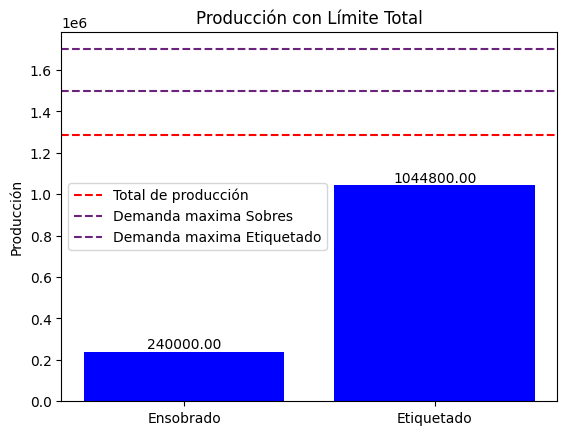

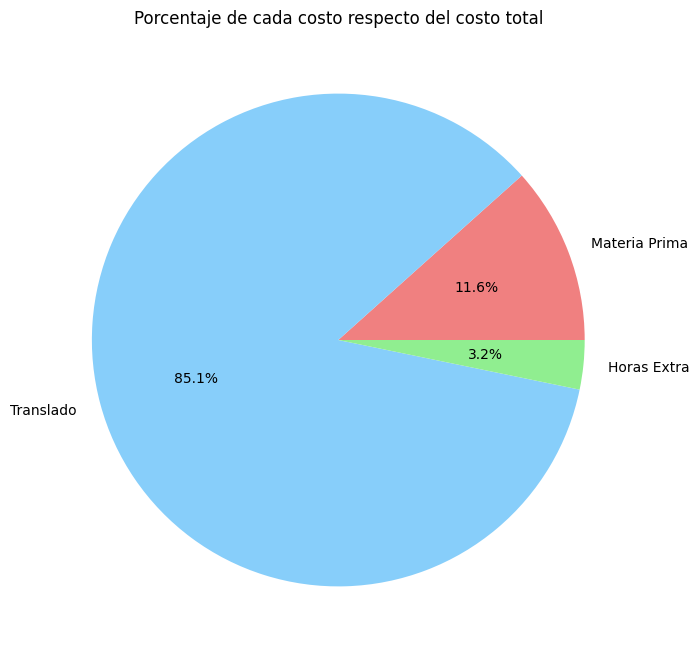

In [20]:
# --- PRODUCCION
produccion_graf = {servicio: producido[servicio].solution_value for servicio in servicios}

total = sum(produccion_graf.values())
fig, ax = plt.subplots()
bars = ax.bar(produccion_graf.keys(), produccion_graf.values(), color='blue')
ax.axhline(y=total, color='r', linestyle='--', label='Total de producción')
ax.axhline(y=LIMITES_PRODUCCION[A], color='#6b227d', linestyle='--', label='Demanda maxima Sobres')
ax.axhline(y=LIMITES_PRODUCCION[B], color='#cb76dd', linestyle='--', label='Demanda maxima Etiquetado')
ax.set_ylabel('Producción')
ax.set_title('Producción con Límite Total')
ax.legend()

# Mostrar el valor sobre cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')


# --- costos
# Datos necesarios
costos = {
    "Materia Prima" : costos_materia_prima.solution_value,
    "Translado" : costo_translado.solution_value,
    "Horas Extra" : costo_horas_extra.solution_value,
    "Capacidad Ociosa": costo_capacidad_ociosa.solution_value
}
total = sum(costos.values())
porcentaje_costos = {tipo: (valor / total) * 100 for tipo, valor in costos.items() if valor > 0}

# Gráfico de pastel para representar el porcentaje de cada aceite en el producto final
plt.figure(figsize=(8, 8))
plt.pie(porcentaje_costos.values(), labels=porcentaje_costos.keys(), autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold', 'lightpink'])
plt.title('Porcentaje de cada costo respecto del costo total')

plt.show()